# Bitcoin Prices Prediction (using Regression techniques)

Dataset used [](https://www.kaggle.com/jessevent/all-crypto-currencies)

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./dataset/crypto-markets.csv', parse_dates=['date'], index_col='date')
print(df.shape)
df.head()

(658167, 9)


,symbol,open,high,low,close,volume,market,name,ranknow
date,,,,,,,,,
2013-04-28,BTC,135.30,135.98,132.10,134.21,0,1500520000,Bitcoin,1
2013-04-29,BTC,134.44,147.49,134.00,144.54,0,1491160000,Bitcoin,1
2013-04-30,BTC,144.00,146.93,134.05,139.00,0,1597780000,Bitcoin,1
2013-05-01,BTC,139.00,139.89,107.72,116.99,0,1542820000,Bitcoin,1
2013-05-02,BTC,116.38,125.60,92.28,105.21,0,1292190000,Bitcoin,1


## Data Exploration

In [3]:
df.tail()

,symbol,open,high,low,close,volume,market,name,ranknow
date,,,,,,,,,
2017-12-17,IGNIS,2.090000,2.380000,2.090000,2.160000,10272,0,Ignis [Futures],1367
2017-12-18,IGNIS,2.160000,2.640000,2.060000,2.540000,3385,0,Ignis [Futures],1367
2017-12-17,BTCA,0.012830,0.014488,0.012793,0.014465,209739,0,Bitair,1368
2017-12-18,BTCA,0.014301,0.017507,0.010392,0.012712,223386,0,Bitair,1368
2017-12-18,LOC,0.693261,1.090000,0.684387,0.891086,169077,0,LockChain,1369


Hence, the dataset contains the prices of cryptocurrencies, other than bitcoin. So, we remove them in the next step.

In [4]:
# Extract the rows containing information of bitcoins
df= df[df['symbol'] == 'BTC']
print(df.shape)

(1696, 9)


In [5]:
df.head()

,symbol,open,high,low,close,volume,market,name,ranknow
date,,,,,,,,,
2013-04-28,BTC,135.30,135.98,132.10,134.21,0,1500520000,Bitcoin,1
2013-04-29,BTC,134.44,147.49,134.00,144.54,0,1491160000,Bitcoin,1
2013-04-30,BTC,144.00,146.93,134.05,139.00,0,1597780000,Bitcoin,1
2013-05-01,BTC,139.00,139.89,107.72,116.99,0,1542820000,Bitcoin,1
2013-05-02,BTC,116.38,125.60,92.28,105.21,0,1292190000,Bitcoin,1


In [6]:
df.drop(['volume', 'symbol', 'name', 'ranknow', 'market'], axis=1, inplace=True) # Dropping unnecessary columns
print(df.shape)

(1696, 4)


In [7]:
# Check for null values
df.isnull().any()

open     False
high     False
low      False
close    False
dtype: bool

In [8]:
df.tail()

,open,high,low,close
date,,,,
2017-12-14,16384.6,17085.8,16185.9,16564.0
2017-12-15,16601.3,18154.1,16601.3,17706.9
2017-12-16,17760.3,19716.7,17515.3,19497.4
2017-12-17,19475.8,20089.0,18974.1,19140.8
2017-12-18,19106.4,19371.0,18355.9,19114.2


## Data visualisation

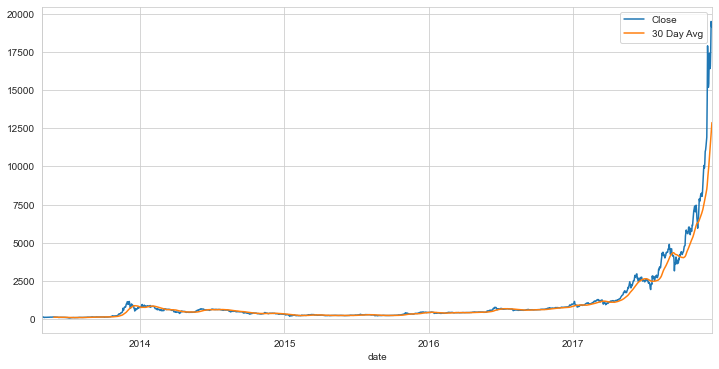

In [9]:
sns.set_style('whitegrid')
df['close'].plot(figsize = (12,6), label = 'Close')

# Plotting the rolling 30 day average against the Close Price
df['close'].rolling(window = 30).mean().plot(label = '30 Day Avg')
plt.legend()

## Preprocessing

In [10]:
# Adding a feature to improve the model. This feature is provided by Tafarel Yan in his Kernel
df['ohlc_average'] = (df['open'] + df['high'] + df['low'] + df['close']) / 4

In [11]:
df.head()

,open,high,low,close,ohlc_average
date,,,,,
2013-04-28,135.30,135.98,132.10,134.21,134.3975
2013-04-29,134.44,147.49,134.00,144.54,140.1175
2013-04-30,144.00,146.93,134.05,139.00,140.9950
2013-05-01,139.00,139.89,107.72,116.99,125.9000
2013-05-02,116.38,125.60,92.28,105.21,109.8675


In [12]:
df['Price_After_Month'] = df['close'].shift(-30) # This will be the dependent variable

In [13]:
df.tail() # We basically moved all our values 30 lines up in our last cell

,open,high,low,close,ohlc_average,Price_After_Month
date,,,,,,
2017-12-14,16384.6,17085.8,16185.9,16564.0,16555.075,NaN
2017-12-15,16601.3,18154.1,16601.3,17706.9,17265.900,NaN
2017-12-16,17760.3,19716.7,17515.3,19497.4,18622.425,NaN
2017-12-17,19475.8,20089.0,18974.1,19140.8,19419.925,NaN
2017-12-18,19106.4,19371.0,18355.9,19114.2,18986.875,NaN


In [14]:
from sklearn import preprocessing

df.dropna(inplace=True)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
# Apply feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

## Model training

### Multiple linear regression

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predicting the Test set results
y_pred = lr.predict(sc.transform(X_test))

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

900.231132477907

In [20]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8645525974920398

In [21]:
accuracy = { "LR": r_squared }

### Support Vector Regression

In [22]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

In [23]:
y_pred = svr.predict(sc.transform(X_test))

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

2490.5202932756106

In [25]:
r_squared = r2_score(y_test, y_pred)
r_squared

-0.03667540389107482

In [26]:
#svr is fitting the data poorly therefore, not including it in the compariosn table
accuracy['SVR'] = r_squared

### Decision tree

In [27]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [28]:
y_pred = dt.predict(sc.transform(X_test))

In [29]:
np.sqrt(mean_squared_error(y_test, y_pred))

810.8949560571839

In [30]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8901014852611717

In [31]:
accuracy["DT"] = r_squared

### Random Forest Regression

In [32]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train )

RandomForestRegressor(n_estimators=10)

In [33]:
y_pred = rfr.predict(sc.transform(X_test))

In [34]:
np.sqrt(mean_squared_error(y_test, y_pred))

624.5330009746204

In [35]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9348111366283209

In [36]:
accuracy["RFR"] = r_squared

### KNN Regression

In [37]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=5, metric='minkowski')
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [38]:
y_pred = knr.predict(sc.transform(X_test))

In [39]:
np.sqrt(mean_squared_error(y_test, y_pred))

586.8138317850285

In [40]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.942447617204273

In [41]:
accuracy["KNR"] = r_squared

## Conclusion

In [42]:
r_squared = pd.DataFrame({ 'Model': accuracy.keys(), 'R^2 Score': accuracy.values() })

<AxesSubplot:xlabel='Model', ylabel='R^2 Score'>

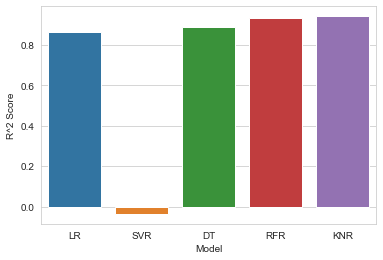

In [43]:
sns.barplot(x='Model', y='R^2 Score', data=r_squared)

- KNN Regression gives the best R^2 score of 0.94 followed by Random-Forest Regression with R^2 score of 0.922.

- SVR fails to make any useful prediction on the given dataset